In [151]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [152]:
kpi = pd.read_excel('siste_rente_kpi.xlsx')

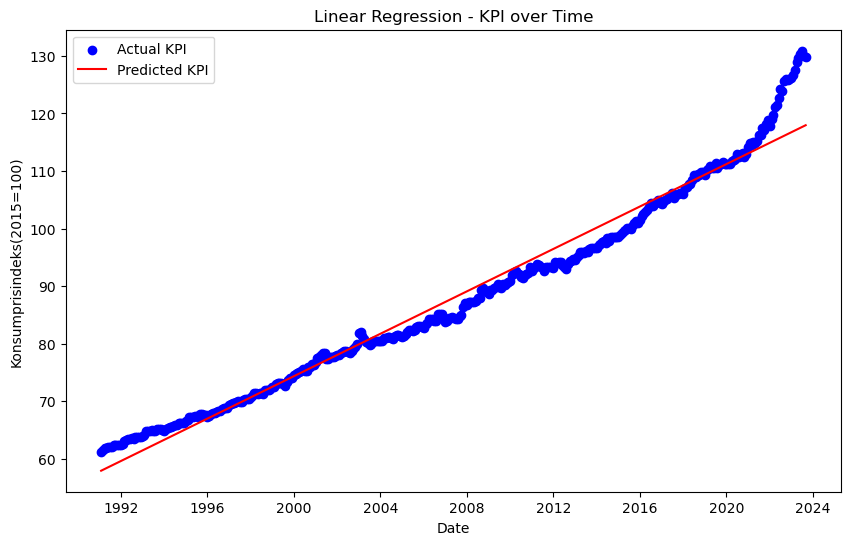

In [153]:
# Convert 'Dato' to datetime object
kpi['Dato'] = pd.to_datetime(kpi['Dato'])

kpi['Dato_numeric'] = (kpi['Dato'] - kpi['Dato'].min()).dt.days

X_kpi = kpi[['Dato_numeric']]
y_kpi = kpi['Konsumprisindeks(2015=100)']

model_kpi_r = LinearRegression()
model_kpi_r.fit(X_kpi, y_kpi)

predictions_kpi = model_kpi_r.predict(X_kpi)

# Extract the first Y value and corresponding date
start_date = kpi['Dato'].min()
start_y_value = y_kpi.iloc[0]

# Calculate the slope for a 2.5% yearly increase
slope =  0.025  # 2.5% as a decimal

# Calculate the intercept based on the start point
intercept = start_y_value - slope * (kpi['Dato'] - start_date).dt.days.iloc[0]

plt.figure(figsize=(10, 6))

# Plotting the data
plt.scatter(kpi['Dato'], y_kpi, color='blue', label='Actual KPI')

# Plotting the regression line
plt.plot(kpi['Dato'], predictions_kpi, color='red', label='Predicted KPI')

# Labels and title
plt.xlabel('Date')
plt.ylabel('Konsumprisindeks(2015=100)')
plt.title('Linear Regression - KPI over Time')
plt.legend()
plt.show()

In [154]:
def model(y, t, k, T, damping):
    I, inflation = y
    dI_dt = k * (inflation - T)
    dinflation_dt = -k * (I - T) - damping * (inflation - T)
    return [np.clip(dI_dt, -0.05, 0.10), np.clip(dinflation_dt, -0.05, 0.10)]

In [155]:
initial_rente = 0.0425
initial_inflasjon = 0.04
mal_inflasjon = 0.02
k = 0.05
damping = 0.1

# Tidsenheter
t = np.linspace(0, 12*25, 300)

In [156]:
resultat = odeint(model, [initial_rente, initial_inflasjon], t, args=(k, mal_inflasjon, damping))

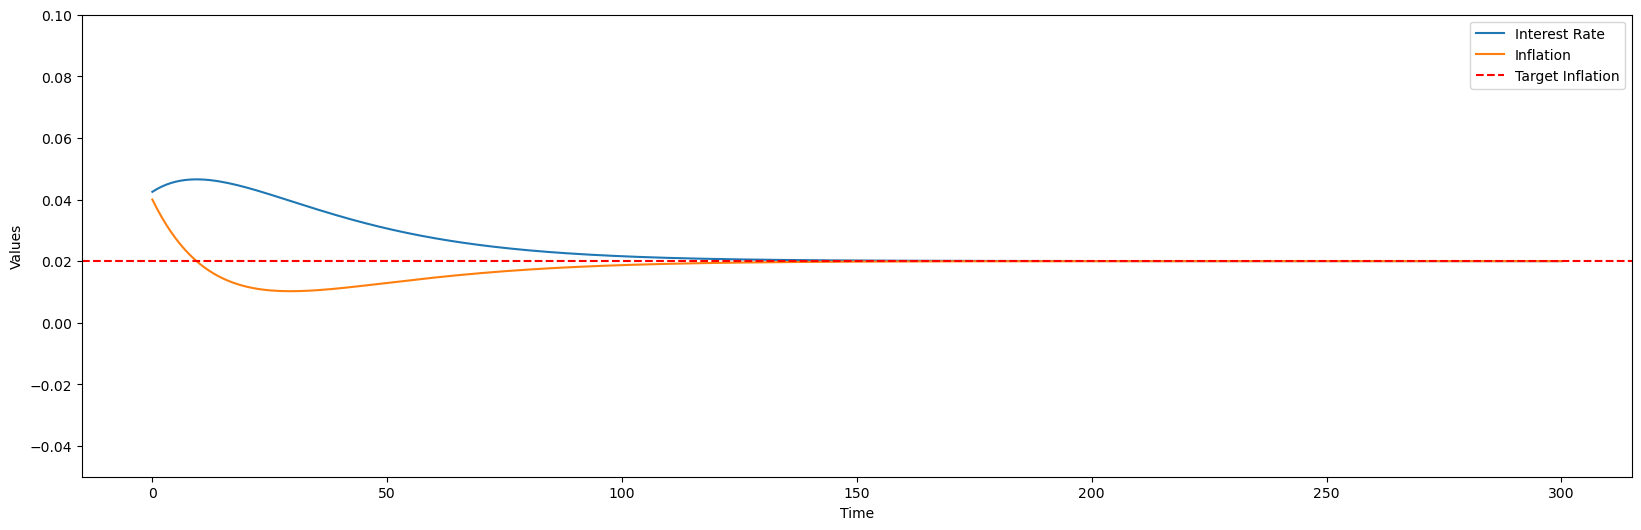

In [157]:
# Increase the size of the plot
plt.figure(figsize=(20, 6))

# Plot the results
plt.plot(t, resultat[:, 0], label='Interest Rate')
plt.plot(t, resultat[:, 1], label='Inflation')
plt.axhline(y=mal_inflasjon, color='r', linestyle='--', label='Target Inflation')
plt.xlabel('Time')
plt.ylabel('Values')
plt.ylim([-0.05, 0.10])  # Set y-axis limits
plt.legend()
plt.show()

In [158]:
rente = [inner_list[0] for inner_list in resultat]

In [159]:
def serielan_kalkulator(lanbelop, renteliste, antall_ar):
    terminer = antall_ar * 12
    monthly_payments = []
    avdrag = lanbelop/terminer
    lanet = lanbelop
    total_betalt = 0

    for monthly_interest_rate in renteliste: 
        
        lanbelop = lanbelop - avdrag

        rentebeløp = lanbelop * monthly_interest_rate

        terminbetaling = avdrag + rentebeløp

        total_betalt += terminbetaling

        monthly_payments.append({
            "Rente": monthly_interest_rate,
            "Gjennværende lån": lanbelop,
            "Terminbeløp": terminbetaling,
            "Betalt lån måend": avdrag,
            "Betalt rente måend": rentebeløp,
            "total betalt": total_betalt
        })

    # Create the DataFrame
    result_df = pd.DataFrame(monthly_payments)

    # Set formatting for float values in the DataFrame
    pd.options.display.float_format = '{:.4f}'.format

    return result_df


Test serial

In [160]:
lan = 2000000
aar = 25

In [161]:
serie = serielan_kalkulator(lan , rente , aar)
serie.head(50)

,Rente,Gjennværende lån,Terminbeløp,Betalt lån måend,Betalt rente måend,total betalt
0,0.0425,1993333.3333,91383.3333,6666.6667,84716.6667,91383.3333
1,0.0434,1986666.6667,92941.3463,6666.6667,86274.6797,184324.6797
2,0.0442,1980000.0000,94200.7830,6666.6667,87534.1163,278525.4626
3,0.0449,1973333.3333,95188.0409,6666.6667,88521.3742,373713.5035
4,0.0454,1966666.6667,95927.6283,6666.6667,89260.9616,469641.1319
5,0.0458,1960000.0000,96442.2267,6666.6667,89775.5600,566083.3585
6,0.0461,1953333.3333,96752.8456,6666.6667,90086.1790,662836.2042
7,0.0463,1946666.6667,96878.9277,6666.6667,90212.2611,759715.1319
8,0.0465,1940000.0000,96838.4633,6666.6667,90171.7966,856553.5952
9,0.0465,1933333.3333,96648.0484,6666.6667,89981.3817,953201.6435


In [164]:
import pandas as pd

def annuitetslan_kalkulator(lanbelop, renteliste, antall_ar):
    terminer = antall_ar * 12
    monthly_payments = []
    
    lanbelop = lanbelop
    total_betalt = 0

    for i , monthly_interest_rate in enumerate(renteliste):
        avdrag = lanbelop * (monthly_interest_rate * (1 + monthly_interest_rate)**(terminer - i)) / ((1 + monthly_interest_rate)**(terminer - i) - 1)

        rentebeløp = lanbelop * monthly_interest_rate

        terminbetaling = avdrag + rentebeløp
        
        avdrag = terminbetaling - rentebeløp

        lanbelop -= avdrag

        total_betalt += terminbetaling

        monthly_payments.append({
            "Rente": monthly_interest_rate,
            "Gjennværende lån": lanbelop,
            "Terminbeløp": terminbetaling,
            "Betalt lån måend": avdrag,
            "Betalt rente måend": rentebeløp,
            "total betalt": total_betalt
        })

    # Create the DataFrame
    result_df = pd.DataFrame(monthly_payments)

    # Set formatting for float values in the DataFrame
    pd.options.display.float_format = '{:.4f}'.format

    return result_df

Test annuitets

In [165]:
annu = annuitetslan_kalkulator(lan , rente , aar)

In [167]:
annu.tail(50)

,Rente,Gjennværende lån,Terminbeløp,Betalt lån måend,Betalt rente måend,total betalt
250,0.0200,2042.0193,109.3095,67.1225,42.1870,3991389.2594
251,0.0200,1976.2556,106.6079,65.7637,40.8443,3991495.8674
252,0.0200,1911.8237,103.9606,64.4319,39.5287,3991599.8280
253,0.0200,1848.6971,101.3664,63.1266,38.2398,3991701.1944
254,0.0200,1786.8498,98.8242,61.8472,36.9770,3991800.0186
255,0.0200,1726.2566,96.3330,60.5932,35.7398,3991896.3516
256,0.0200,1666.8925,93.8918,59.3641,34.5277,3991990.2434
257,0.0200,1608.7332,91.4996,58.1593,33.3402,3992081.7430
258,0.0200,1551.7548,89.1553,56.9784,32.1769,3992170.8983
259,0.0200,1495.9339,86.8580,55.8208,31.0371,3992257.7562
